In [54]:
###-----------------
### Import libraries
###-----------------
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib

from sklearn.datasets import make_moons
from sklearn.model_selection import  train_test_split # Import function to split dataset into training and testing subsets
from sklearn.metrics import * # Import function to calculate various metric

import tensorflow as tf
tf.keras.datasets.fashion_mnist
import cv2
from utils_helper.helper import plot_graph


In [2]:
###----------------------
### Some basic parameters
###----------------------

inpDir = Path('..') / '..' / 'input'
outDir = Path('..') / 'output'
modelDir = Path('..') / 'models'
subDir = 'fifa_2019'

RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

EPOCHS = 100 # number of epochs
BATCH_SIZE = 32
ALPHA = 0.001 # learning rate
TEST_SIZE = 0.2
# TRAIN_SIZE=int(18*BATCH_SIZE)


WEIGHT_DECAY = 0.001
PATENCE = 20
LR_FACTOR = 0.1
LR_PATIENCE = 5
MIN_LR = 1e-6

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
labels_name = pd.DataFrame({
    'label':[x for x in range(0,10)],
    'class':['T-shirt/top','Trouser',"Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
})

class_names = [
        'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
    ]

labels_name

,label,class
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


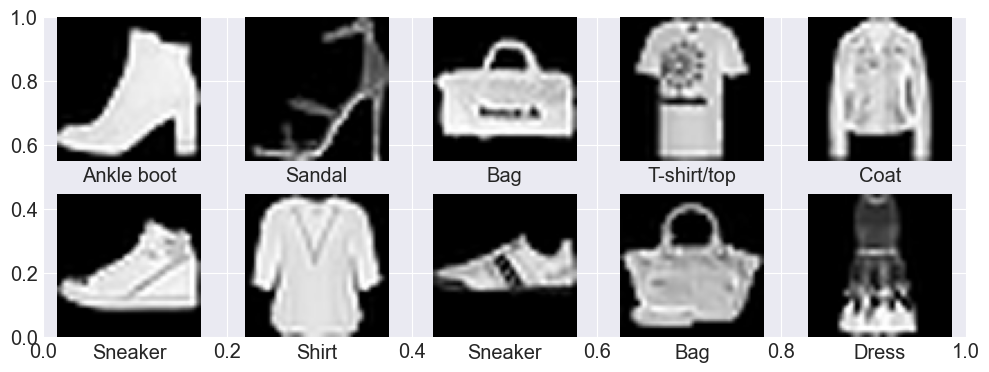

In [5]:
def fn_plot_images(train_images,train_labels):
    n_images = 10

    plt.subplots(figsize=(10,4))
    for i in range(n_images):
        plt.subplot(2, 5, i + 1)

        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        rand=np.random.randint(0,len(train_images))
        image=cv2.resize(train_images[rand],(64,64),interpolation=cv2.INTER_CUBIC)
        image=cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
        plt.imshow(image)
        plt.xlabel(class_names[train_labels[rand]])

    plt.tight_layout()
    plt.show()

fn_plot_images(train_images,train_labels)

In [6]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

train_ds = train_ds.batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)

In [7]:
for batch,(data,labels) in enumerate(train_ds):
    print(f'BATCH :{batch} , shape :{data.shape},labels:{labels}')

BATCH :0 , shape :(32, 28, 28),labels:[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4 5 3]
BATCH :1 , shape :(32, 28, 28),labels:[6 6 0 8 5 2 1 6 6 7 9 5 9 2 7 3 0 3 3 3 7 2 2 6 6 8 3 3 5 0 5 5]
BATCH :2 , shape :(32, 28, 28),labels:[0 2 0 0 4 1 3 1 6 3 1 4 4 6 1 9 1 3 5 7 9 7 1 7 9 9 9 3 2 9 3 6]
BATCH :3 , shape :(32, 28, 28),labels:[4 1 1 8 8 0 1 1 6 8 1 9 7 8 8 9 6 6 3 1 5 4 6 7 5 5 9 2 2 2 7 6]
BATCH :4 , shape :(32, 28, 28),labels:[4 1 8 7 7 5 4 2 9 1 7 4 6 9 7 1 8 7 1 2 8 0 9 1 8 7 0 5 8 6 7 2]
BATCH :5 , shape :(32, 28, 28),labels:[0 8 7 1 6 2 1 9 6 0 1 0 5 5 1 7 0 5 8 4 0 4 0 6 6 4 0 0 4 7 3 0]
BATCH :6 , shape :(32, 28, 28),labels:[5 8 4 1 1 2 9 2 8 5 0 6 3 4 6 0 9 1 7 3 8 5 8 3 8 5 2 0 8 7 0 3]
BATCH :7 , shape :(32, 28, 28),labels:[5 0 6 5 2 7 5 2 6 8 2 6 8 0 4 4 4 4 4 1 5 6 5 3 3 7 3 3 6 2 8 4]
BATCH :8 , shape :(32, 28, 28),labels:[6 5 9 3 2 3 2 4 4 8 2 5 3 0 7 2 0 2 5 7 2 3 1 7 6 2 9 1 9 1 1 8]
BATCH :9 , shape :(32, 28, 28),labels:[7 8 4 2 6 6 7 9 4 6 1 9 5

Rescaling

In [8]:
image = train_images[0]
image.min(),image.max()

(np.uint8(0), np.uint8(255))

In [ ]:
norm_layer = tf.keras.layers.Rescaling(1.0/255)

train_ds = train_ds.map(lambda x,y :norm_layer(x),)



NameError: name 'y' is not defined

In [10]:
data = train_ds.take(0)


In [11]:
next(iter(train_ds))[0]

<tf.Tensor: shape=(32, 28, 28), dtype=uint8, numpy=
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0,

## Define Model

<Axes: >

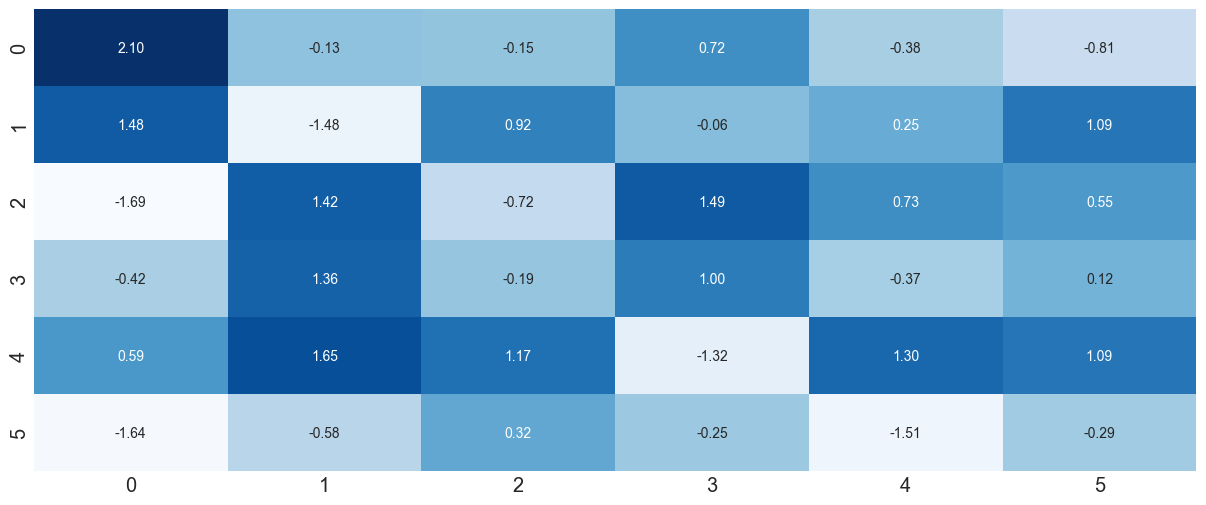

In [12]:
input_shape = (1,6,6,1)
X = tf.random.normal(input_shape)
sns.heatmap(X.numpy()[0,:,:,0],annot=True,fmt='.2f',cbar=False,cmap='Blues')

(1, 4, 4, 1)


<Axes: >

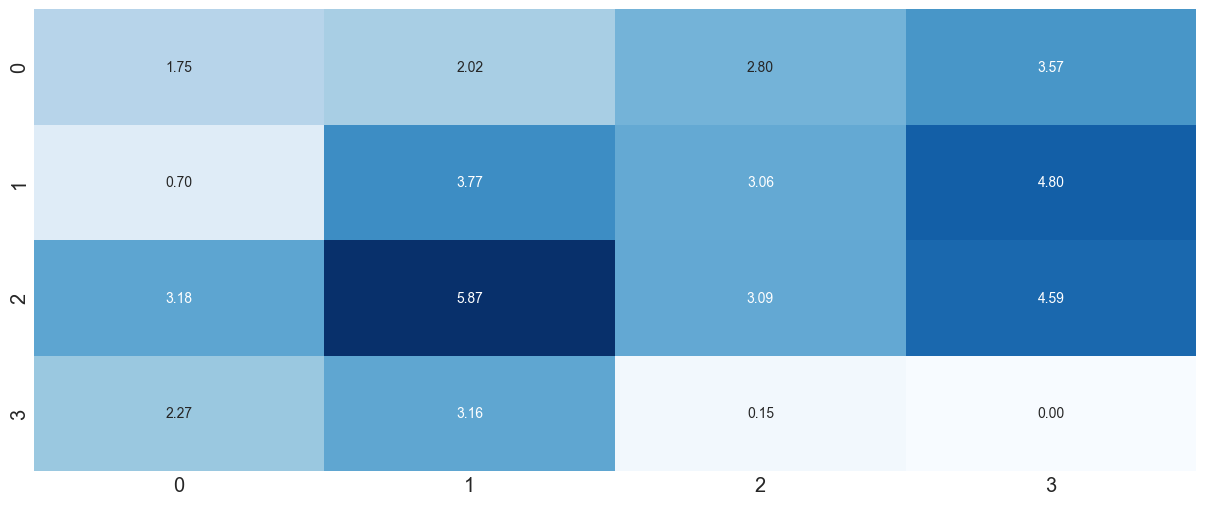

In [13]:
y= tf.keras.layers.Conv2D(1,3,kernel_initializer=tf.constant_initializer(1.0),use_bias=False,activation='relu')(X)
print(y.shape)
sns.heatmap(y.numpy()[0,:,:,0],annot=True,fmt='.2f',cbar=False,cmap='Blues')

<Axes: >

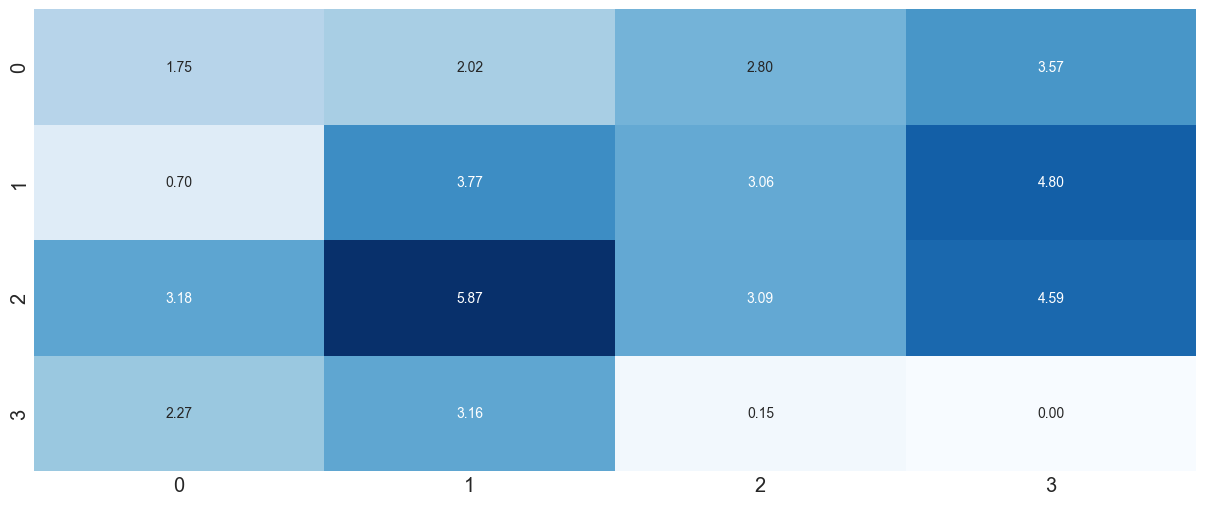

In [14]:
max_pool_2d = tf.keras.layers.MaxPool2D()(y)
sns.heatmap(y.numpy()[0,:,:,0],annot=True,fmt='.2f',cbar=False,cmap='Blues')

## Build the Model

In [15]:
image.shape

(28, 28)

In [16]:
tf.keras.layers.MaxPool2D

keras.src.layers.pooling.max_pooling2d.MaxPooling2D

In [17]:
input_shape = (28,28,1)
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=input_shape))
model.add(tf.keras.layers.Rescaling(1.0/255))

#Set1
model.add(tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'))  #(28*28*32)
model.add(tf.keras.layers.MaxPool2D()) #(14,14,32)

#Set2
model.add(tf.keras.layers.Conv2D(64,(3,3),padding='valid',activation='relu'))  #(12*12*64)
model.add(tf.keras.layers.MaxPool2D()) #(6,6,32)

#Set3
model.add(tf.keras.layers.Conv2D(128,(3,3),padding='valid',activation='relu'))  #(4*4*128)
model.add(tf.keras.layers.MaxPool2D()) #(2,2,32)

model.add(tf.keras.layers.Flatten())

## Head
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10))

optimize = tf.keras.optimizers.Adam(learning_rate=ALPHA)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimize,loss=loss_fn,metrics=['accuracy'])


In [18]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=LR_FACTOR,
    patience=LR_PATIENCE,
    verbose=1,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=MIN_LR,
)

es_callback = tf.keras.callbacks.EarlyStopping(

    monitor="val_loss",
    min_delta=0,
    patience=PATENCE,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


EPOCHS = 100 # number of epochs
BATCH_SIZE = 32
ALPHA = 0.001 # learning rate
TEST_SIZE = 0.2
# TRAIN_SIZE=int(18*BATCH_SIZE)


WEIGHT_DECAY = 0.001
PATENCE = 20
LR_FACTOR = 0.1
LR_PATIENCE = 5
MIN_LR = 1e-6

In [19]:
history = model.fit(train_ds,validation_data=test_ds,epochs=EPOCHS,callbacks=[lr_callback,es_callback])

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8366 - loss: 0.4476 - val_accuracy: 0.8781 - val_loss: 0.3343 - learning_rate: 0.0010
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8945 - loss: 0.2855 - val_accuracy: 0.8936 - val_loss: 0.2953 - learning_rate: 0.0010
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9114 - loss: 0.2398 - val_accuracy: 0.8976 - val_loss: 0.2848 - learning_rate: 0.0010
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9232 - loss: 0.2070 - val_accuracy: 0.9055 - val_loss: 0.2645 - learning_rate: 0.0010
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9336 - loss: 0.1802 - val_accuracy: 0.9101 - val_loss: 0.2656 - learning_rate: 0.0010
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9406 - loss: 0.1581 - val_accuracy: 0.9116 - val_loss: 0.2749 - learning_rate: 0.0010
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step -

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 478,880 (1.83 MB)

 Trainable params: 159,626 (623.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 319,254 (1.22 MB)

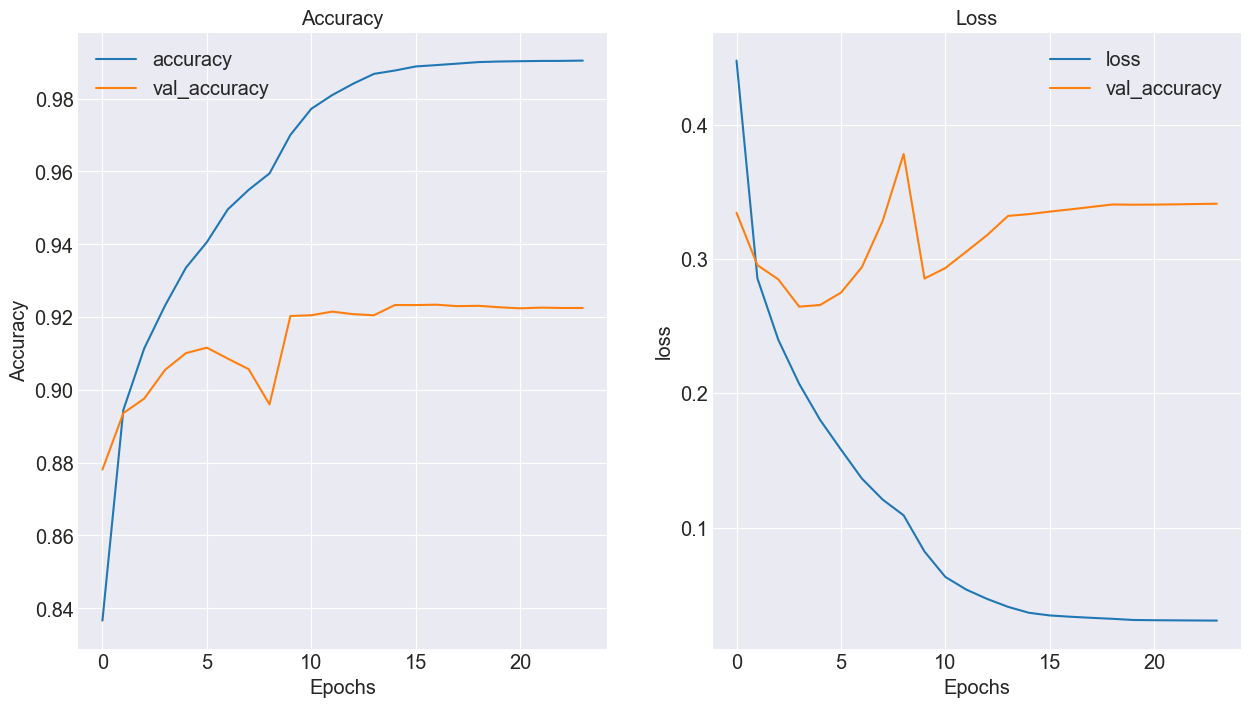

In [21]:
plot_graph(history)

## Make Predictions 

In [20]:
yhat = model.predict(test_ds)
y_pred = yhat.argmax(axis=1)
print(f"accuracy:{accuracy_score(test_labels,y_pred):.2f}")
print(classification_report(test_labels,y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
accuracy:0.92
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.88      0.88      1000
           3       0.92      0.92      0.92      1000
           4       0.89      0.88      0.88      1000
           5       0.99      0.98      0.99      1000
           6       0.78      0.77      0.77      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
from theory.utils_helper.helper import fn_plot_confusion_matrix


fn_plot_confusion_matrix(test_labels,y_pred)

## Final Images plots

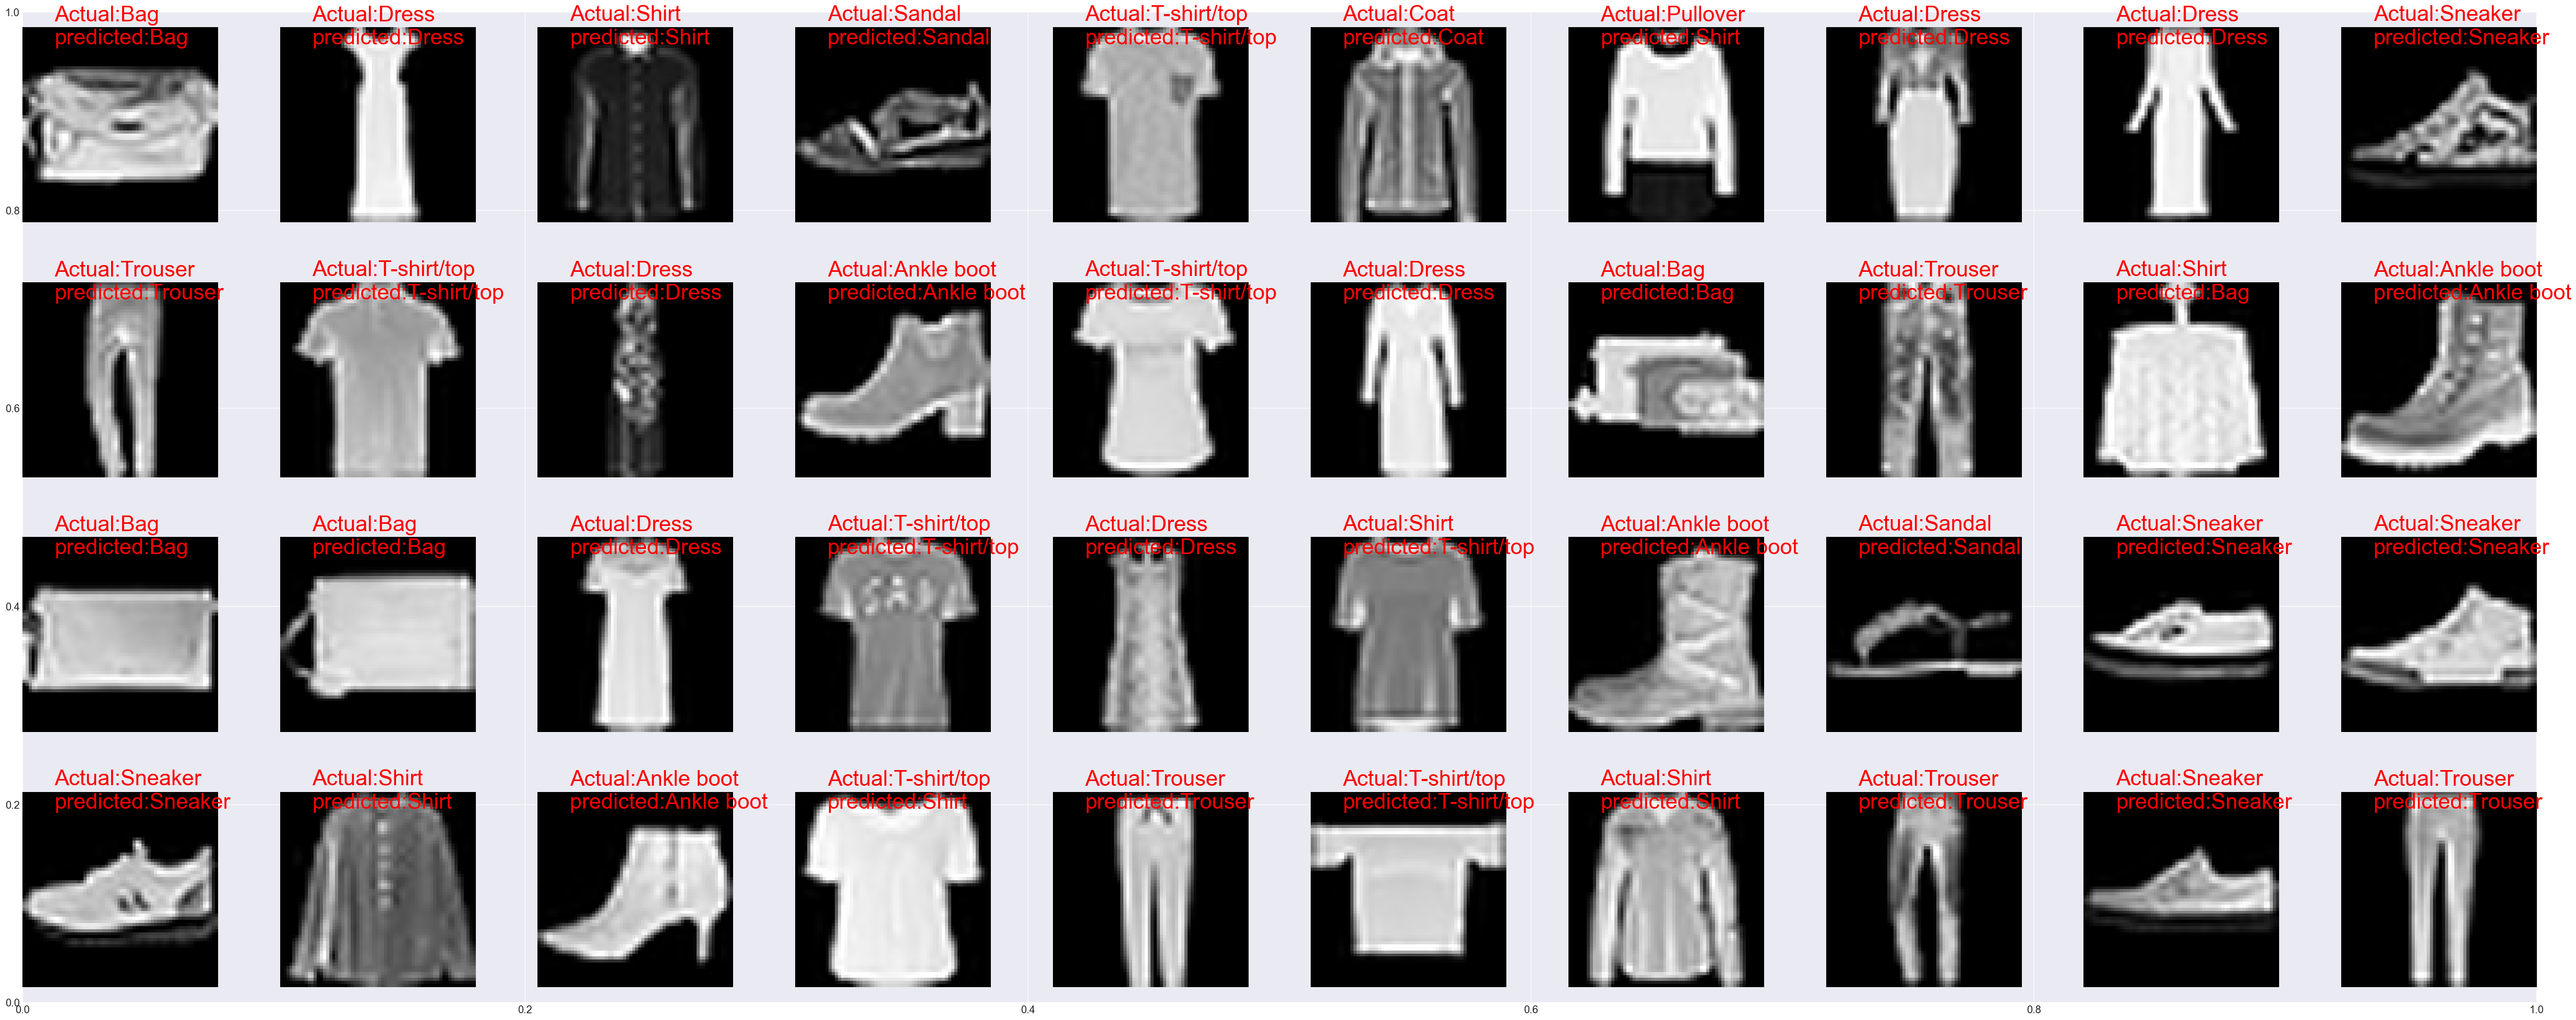

In [43]:
def fn_plot_images(train_images,train_labels,y_pred):
    n_images = 40

    plt.subplots(figsize=(50,20))
    for i in range(n_images):
        plt.subplot(4, 10, i + 1)

        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        rand=np.random.randint(0,len(train_images))
        image=cv2.resize(train_images[rand],(64,64),interpolation=cv2.INTER_CUBIC)
        image=cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
        plt.imshow(image)
        plt.text(x=10,y=5,s=f'Actual:{class_names[train_labels[rand]]}\npredicted:{class_names[y_pred[rand]]}',color='red',fontsize=30)
        # plt.xlabel(class_names[train_labels[rand]])

    plt.tight_layout()
    plt.show()

fn_plot_images(test_images,test_labels,y_pred)

## Model with regularizer to reduce overfitting

In [47]:
input_shape = (28,28,1)
regularizer = tf.keras.regularizers.L2(l2=0.001)

model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=input_shape))
model.add(tf.keras.layers.Rescaling(1.0/255))

#Set1
model.add(tf.keras.layers.Conv2D(32,(3,3),padding='same',kernel_regularizer=regularizer,activation='relu'))  #(28*28*32)
model.add(tf.keras.layers.MaxPool2D()) #(14,14,32)

#Set2
model.add(tf.keras.layers.Conv2D(64,(3,3),padding='valid',kernel_regularizer=regularizer,activation='relu'))  #(12*12*64)
model.add(tf.keras.layers.MaxPool2D()) #(6,6,32)

#Set3
model.add(tf.keras.layers.Conv2D(128,(3,3),padding='valid',kernel_regularizer=regularizer,activation='relu'))  #(4*4*128)
model.add(tf.keras.layers.MaxPool2D()) #(2,2,32)

model.add(tf.keras.layers.Flatten())

## Head
model.add(tf.keras.layers.Dense(128,activation='relu',kernel_regularizer=regularizer))
model.add(tf.keras.layers.Dense(10))

optimize = tf.keras.optimizers.Adam(learning_rate=ALPHA)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimize,loss=loss_fn,metrics=['accuracy'])


In [48]:
history = model.fit(train_ds,validation_data=test_ds,epochs=EPOCHS,callbacks=[lr_callback,es_callback])

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8237 - loss: 0.6469 - val_accuracy: 0.8697 - val_loss: 0.5073 - learning_rate: 0.0010
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8769 - loss: 0.4657 - val_accuracy: 0.8768 - val_loss: 0.4634 - learning_rate: 0.0010
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8876 - loss: 0.4246 - val_accuracy: 0.8813 - val_loss: 0.4417 - learning_rate: 0.0010
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8947 - loss: 0.4003 - val_accuracy: 0.8836 - val_loss: 0.4277 - learning_rate: 0.0010
Epoch 5/100
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8983 - loss: 0.3843
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8986 - loss: 0.3837 - val_accuracy: 0.8892 - val_loss: 0.4131 - learning_rate: 0.0010
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - a

In [49]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 478,880 (1.83 MB)

 Trainable params: 159,626 (623.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 319,254 (1.22 MB)

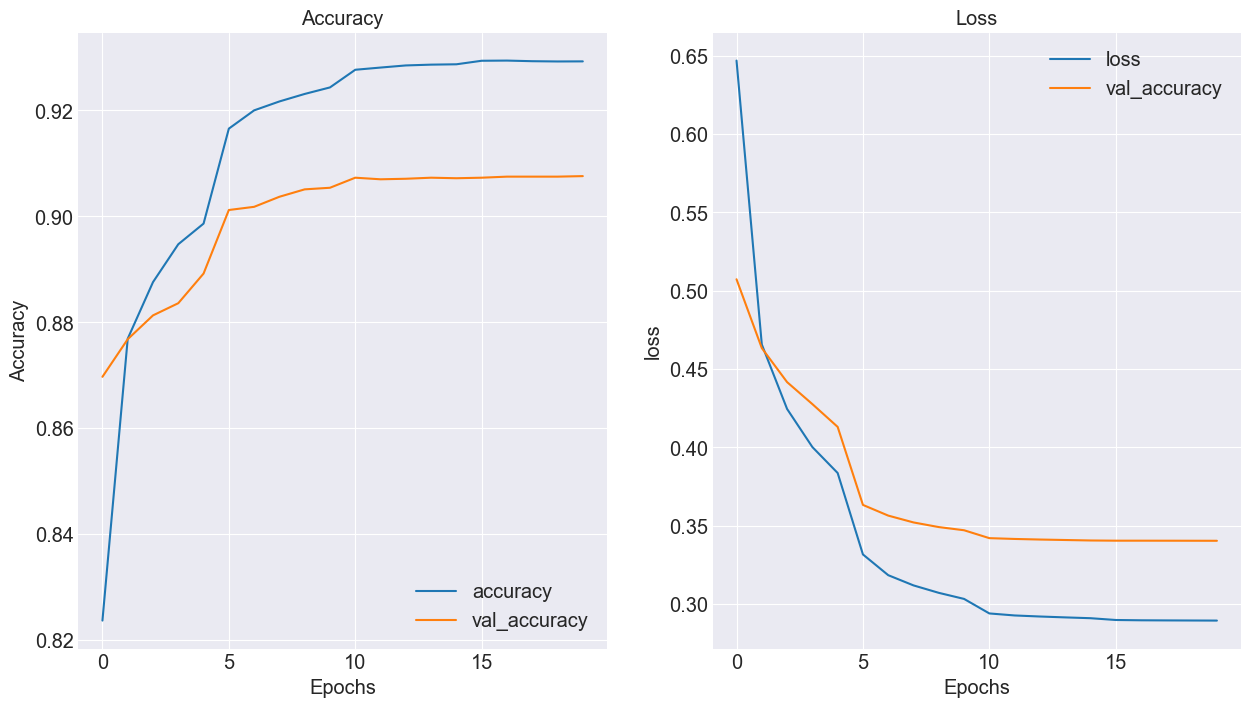

In [50]:
plot_graph(history)

## With Dropout BatchNorm

In [ ]:
input_shape = (28,28,1)

model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=input_shape))
model.add(tf.keras.layers.Rescaling(1.0/255))

#Set1
model.add(tf.keras.layers.Conv2D(32,(3,3),padding='same'))  #(28*28*32)
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.MaxPool2D()) #(14,14,32)
model.add(tf.keras.layers.Dropout(0.1))

#Set2
model.add(tf.keras.layers.Conv2D(64,(3,3),padding='valid'))  #(12*12*64)
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.MaxPool2D()) #(6,6,32)
model.add(tf.keras.layers.Dropout(0.2))

#Set3
model.add(tf.keras.layers.Conv2D(128,(3,3),padding='valid'))  #(4*4*128)
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
# model.add(tf.keras.layers.MaxPool2D()) #(2,2,32)
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())

## Head
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10))

optimize = tf.keras.optimizers.Adam(learning_rate=ALPHA)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimize,loss=loss_fn,metrics=['accuracy'])


In [52]:
history = model.fit(train_ds,validation_data=test_ds,epochs=100,callbacks=[lr_callback,es_callback])

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - accuracy: 0.8060 - loss: 0.5350 - val_accuracy: 0.8693 - val_loss: 0.3491 - learning_rate: 0.0010
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.8678 - loss: 0.3650 - val_accuracy: 0.8741 - val_loss: 0.3256 - learning_rate: 0.0010
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.8838 - loss: 0.3211 - val_accuracy: 0.8597 - val_loss: 0.3504 - learning_rate: 0.0010
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.8909 - loss: 0.2980 - val_accuracy: 0.8912 - val_loss: 0.2800 - learning_rate: 0.0010
Epoch 5/100
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8978 - loss: 0.2799
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.8988 - loss: 0.2781 - val_accuracy: 0.8654 - val_loss: 0.3396 - learning_rate: 0.0010
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - a

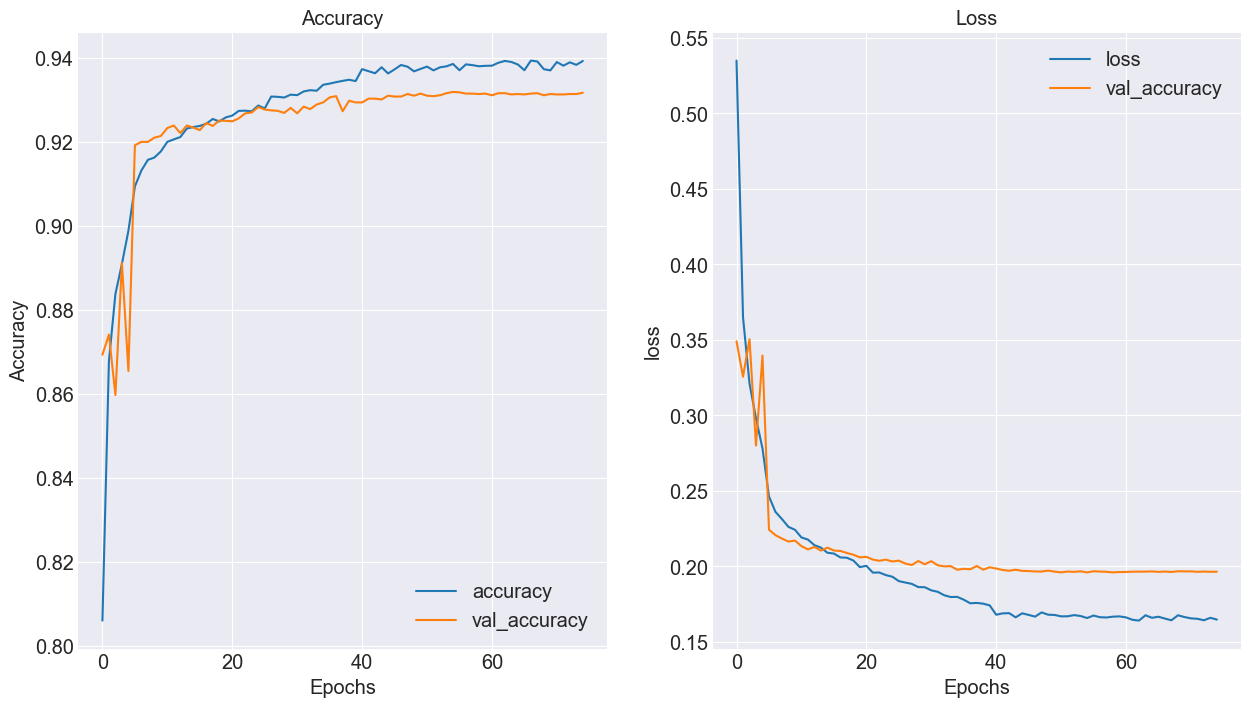

In [53]:
plot_graph(history)